<a href="https://colab.research.google.com/github/gabriellimf/gabriellimf/blob/main/notebooks/Image%20Crop%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Copyright 2021 Twitter, Inc.
SPDX-License-Identifier: Apache-2.0
```

## Image Crop Analysis

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/twitter-research/image-crop-analysis/blob/master/notebooks/Image%20Crop%20Analysis.ipynb)

In [21]:
import logging
import shlex
import subprocess
import sys
from collections import namedtuple
from pathlib import Path

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

logging.basicConfig(level=logging.ERROR)

In [22]:
import platform

BIN_MAPS = {"Darwin": "mac", "Linux": "linux"}

HOME_DIR = Path("../").expanduser()

try:
    import google.colab
    ! pip install pandas scikit-learn scikit-image statsmodels requests dash
    ! [[ -d image-crop-analysis ]] || git clone https://github.com/twitter-research/image-crop-analysis.git
    HOME_DIR = Path("./image-crop-analysis").expanduser()
    IN_COLAB = True
except:
    IN_COLAB = False

sys.path.append(str(HOME_DIR / "src"))
bin_dir = HOME_DIR / Path("./bin")
bin_path = bin_dir / BIN_MAPS[platform.system()] / "candidate_crops"
model_path = bin_dir / "fastgaze.vxm"
data_dir = HOME_DIR / Path("./data/")
data_dir.exists()

True

In [23]:
img_path = next(data_dir.glob("./*.jpeg"))
img_path

PosixPath('image-crop-analysis/data/dummy.jpeg')

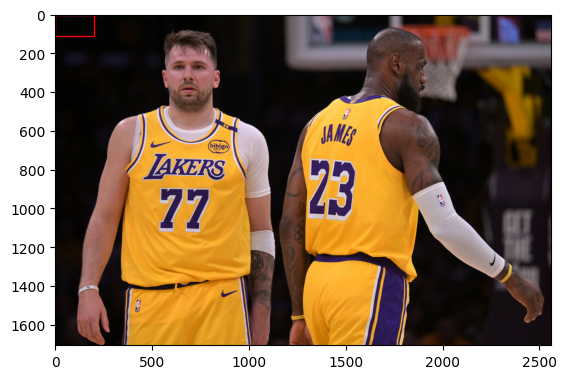

In [24]:
img = mpimg.imread(img_path)
plt.imshow(img)
plt.gca().add_patch(
    Rectangle((0, 0), 200, 112, linewidth=1, edgecolor="r", facecolor="none")
)

In [25]:
str(img_path.absolute())

'/content/image-crop-analysis/data/dummy.jpeg'

In [26]:
cmd = f"{str(bin_path)} {str(model_path)} '{img_path.absolute()}' show_all_points"
cmd

"image-crop-analysis/bin/linux/candidate_crops image-crop-analysis/bin/fastgaze.vxm '/content/image-crop-analysis/data/dummy.jpeg' show_all_points"

In [27]:
output = subprocess.check_output(cmd, shell=True)  # Success!
print(output.splitlines())

[b'704 832', b'0 115 2560 1434', b'0 0 1707 1707', b'0 0 1497 1707', b'277 0 854 1707', b'0 0 2560 1707', b'64 64 0.112564', b'192 64 0.047607', b'320 64 0.394826', b'448 64 1.04344', b'576 64 1.88215', b'704 64 2.1989', b'832 64 1.56011', b'960 64 0.863258', b'1088 64 0.525986', b'1216 64 0.850736', b'1344 64 1.14346', b'1472 64 1.21192', b'1600 64 1.21683', b'1728 64 1.44597', b'1856 64 1.49849', b'1984 64 1.44889', b'2112 64 1.49486', b'2240 64 1.56459', b'2368 64 1.54972', b'2496 64 1.02302', b'64 192 0.229529', b'192 192 0.37554', b'320 192 1.04538', b'448 192 2.19587', b'576 192 4.01461', b'704 192 4.83731', b'832 192 3.59649', b'960 192 1.98227', b'1088 192 1.13158', b'1216 192 1.49844', b'1344 192 1.9951', b'1472 192 2.20805', b'1600 192 2.35375', b'1728 192 2.89766', b'1856 192 3.06874', b'1984 192 2.96223', b'2112 192 2.82544', b'2240 192 2.84116', b'2368 192 2.67281', b'2496 192 1.82542', b'64 320 -0.0286054', b'192 320 0.0278264', b'320 320 1.02124', b'448 320 2.77821', b'5

In [28]:
! {str(bin_path)} {str(model_path)} '{img_path.absolute()}' show_all_points | head

showAllPoints=true, argv[3]=show_all_points
704 832
0 115 2560 1434
0 0 1707 1707
0 0 1497 1707
277 0 854 1707
0 0 2560 1707
64 64 0.112564
192 64 0.047607
320 64 0.394826
448 64 1.04344


In [30]:
from crop_api import ImageSaliencyModel, is_symmetric, parse_output, reservoir_sampling

In [31]:
parse_output(output).keys()

dict_keys(['salient_point', 'crops', 'all_salient_points'])

In [32]:
model = ImageSaliencyModel(crop_binary_path=bin_path, crop_model_path=model_path)

In [33]:
plt.matplotlib.__version__

'3.10.0'

In [34]:
list(data_dir.glob("./*.jpeg"))

[PosixPath('image-crop-analysis/data/dummy.jpeg'),
 PosixPath('image-crop-analysis/data/dummy2.jpeg')]

image-crop-analysis/data/dummy.jpeg
None 2560 1707


AttributeError: module 'PIL.Image' has no attribute 'ANTIALIAS'

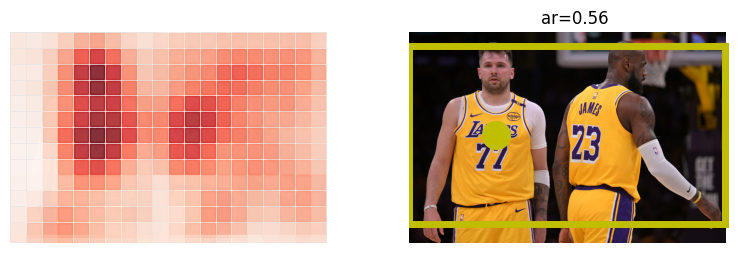

In [36]:
for img_path in data_dir.glob("*.jpeg"):
    print(img_path)
    model.plot_img_crops(img_path)

image-crop-analysis/data/dummy.jpeg
None 1034 851


AttributeError: module 'PIL.Image' has no attribute 'ANTIALIAS'

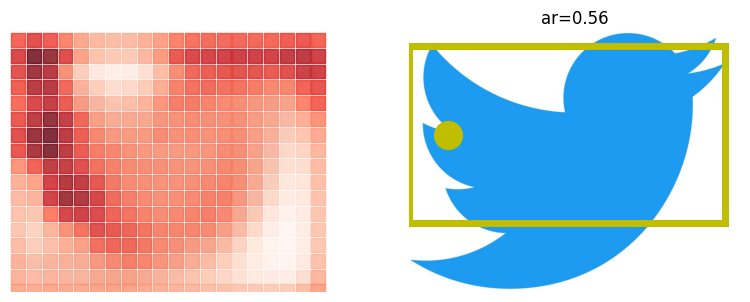

In [17]:
for img_path in data_dir.glob("*.jpeg"):
    print(img_path)
    model.plot_img_crops(img_path)

None 1034 851


AttributeError: module 'PIL.Image' has no attribute 'ANTIALIAS'

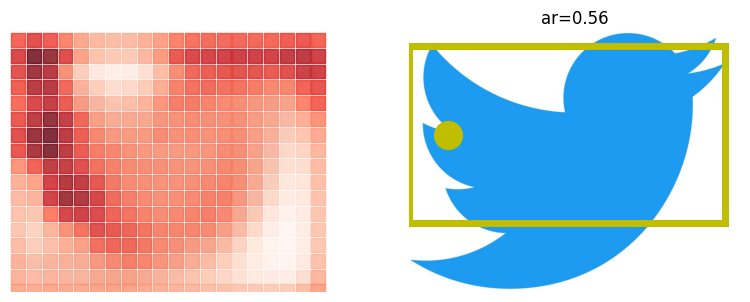

In [19]:
for img_path in reservoir_sampling(data_dir.glob("./*.jpeg"), K=5):
    model.plot_img_crops(img_path)

None 1034 851


AttributeError: module 'PIL.Image' has no attribute 'ANTIALIAS'

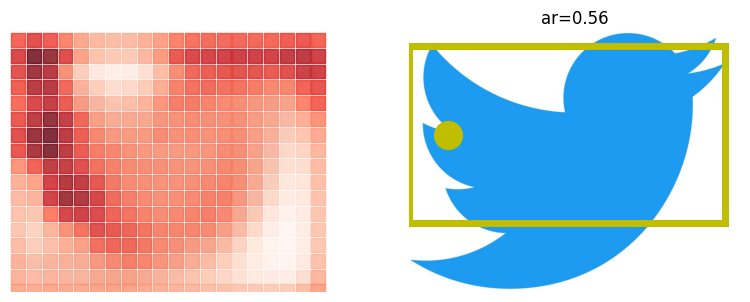

In [20]:
model.plot_img_crops(data_dir / Path("./dummy.jpeg"), topK=2)
plt.savefig("dummy.jpg", bbox_inches="tight")

## Sample crops based on saliency scores


* First, we show the top 3 crops based sorted saliency scores (highest first)
* Next, we show the top 3 crops sampled based on saliency scores converted into probs using the following formula:

$$
\begin{equation}
p_i = \frac{exp(s_i)}{Z}\\
Z = \sum_{j=0}^{j=N} exp(s_j)
\end{equation}
$$

In [ ]:
model.plot_img_crops(data_dir / Path("./dummy.jpeg"), topK=3)
plt.savefig("dummy_top3.jpeg", bbox_inches="tight")

In [ ]:
model.plot_img_crops(data_dir / Path("./dummy.jpeg"), topK=3, sample=True)

## Crop an image generated using combination of images

In [ ]:
from PIL import Image

from image_manipulation import join_images

In [ ]:
images = [Image.open(x) for x in data_dir.glob("./*.jpeg")]
img = join_images(images, col_wrap=2, img_size=(128, -1))

In [ ]:
img

In [ ]:
images = [
    Image.open(data_dir / Path("./dummy.jpeg")),
    Image.open(data_dir / Path("./dummy.jpeg")),
]
img = join_images(images, col_wrap=2, img_size=(128, 128), padding=0)
model.plot_img_crops_using_img(img, topK=5)
plt.savefig("dummy_dummy.jpeg", bbox_inches="tight")

In [ ]:
images = [
    Image.open(data_dir / Path("./dummy.jpeg")),
    Image.open(data_dir / Path("./dummy.jpeg")),
]
img = join_images(images, col_wrap=1, img_size=(128, 128), padding=100)
model.plot_img_crops_using_img(img, topK=1)

In [ ]:
img

In [ ]:
img.save("dummy_dummy_stiched.jpeg", "JPEG")

In [ ]:
img_path = Path("dummy_dummy_stiched.jpeg")
model.plot_img_crops(img_path, topK=1)
plt.savefig("dummy_dummy.jpeg", bbox_inches="tight")

In [ ]:
model.plot_img_crops(data_dir / Path("./dummy.jpeg"), topK=2, aspectRatios=[0.56])
plt.savefig("dummy.jpeg", bbox_inches="tight")

In [ ]:
img_path = Path("dummy_dummy_stiched.jpeg")
model.plot_img_crops(img_path, topK=1, add_saliency_line=False, col_wrap=3)
plt.savefig("dummy_dummy.jpeg", bbox_inches="tight")